## Decision Tree
### Import your dataset
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms. The dataset has one binary class (i.e., the first column) and 22 attributes (i.e., all other columns) and contains 8124 records. In this task, you can treat the missing values as a new category of the attribute.
https://archive.ics.uci.edu/ml/datasets/Mushroom

### built-in functions and attributes 
Make use of the function imported below.


In [1]:
# import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import plot_confusion_matrix

In [2]:
data= pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### 1. Count the number of samples in each class

In [5]:
data.groupby("class").size()
#data.value_counts('class') # Alternative solution

class
e    4208
p    3916
dtype: int64

#### 2. Check if you have any null values 

In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### 3.Use bar chart to plot class e and p (use seaborn)

<AxesSubplot:xlabel='class', ylabel='count'>

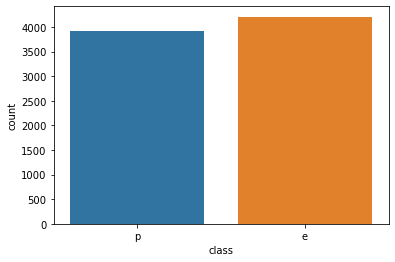

In [7]:
sns.countplot(x="class", data=data)

#### 4. Convert the categorical values to numberical using LabelEncoder

In [8]:
df = data.apply(LabelEncoder().fit_transform)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


#### 5.Define your x and y. Split them into 70-30 % for training.

In [9]:
x = df.drop(columns=['class']) # All columns besides the first one
y = df.drop(data.loc[:, 'cap-shape':'habitat'].columns, axis = 1) # Only the first column

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

#### 6. Create your decision tree model and train 

In [11]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

#### 7. Display Training Accuracy, Testing Accuracy and produce 

In [12]:
y_pred = dtree.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 1.0


In [13]:
y_pred = dtree.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_pred))

Training Accuracy: 1.0


#### 8. Plot the confusion matrix and get the classification report

In [14]:
tn, fp, fn, tp = confusion_matrix(y_test, dtree.predict(X_test)).ravel()
print('True Negative\t= ', tn, '\nFalse Positive\t= ', fp, '\nFalse Negative\t= ', fn, '\nTrue Positive\t= ', tp)

True Negative	=  1236 
False Positive	=  0 
False Negative	=  0 
True Positive	=  1202


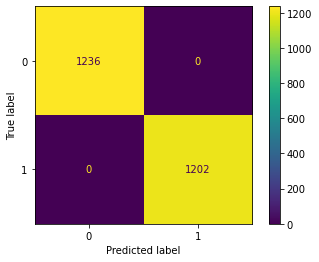

In [15]:
plot_confusion_matrix(dtree, X_test, y_test)

In [16]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2972
           1       1.00      1.00      1.00      2714

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686

